In [1]:
import os
os.chdir('../..')

In [2]:
import numpy as np
import torch

from rdkit.Chem.Draw import IPythonConsole
from IPython.display import SVG

from molexplain.utils import MODELS_PATH, PROCESSED_DATA_PATH, DEVICE

RDKit WARNING: [16:01:10] Enabling RDKit 2019.09.3 jupyter extensions


In [3]:
model = torch.load(os.path.join(MODELS_PATH, "AZ_ChEMBL_global.pt"), map_location=DEVICE)
inchis = np.load(os.path.join(PROCESSED_DATA_PATH, "inchis.npy"))

Using backend: pytorch


In [4]:
from rdkit.Chem import MolFromInchi

In [5]:
example_inchi = inchis[59]
print(example_inchi)

InChI=1S/C19H18F3N3O2/c1-2-24(9-10-26)18(27)16-11-13-5-4-8-23-17(13)25(16)15-7-3-6-14(12-15)19(20,21)22/h3-8,11-12,26H,2,9-10H2,1H3


In [6]:
mol = MolFromInchi(example_inchi)

In [7]:
from molexplain.vis import molecule_importance
svg, atom_importance, global_importance = molecule_importance(mol, model, task=2, vis_factor=5)

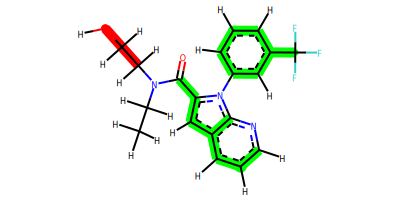

In [8]:
svg

In [9]:
global_importance

array([ 0.07077732, -0.0121754 , -0.08028338, -0.01496268], dtype=float32)

In [36]:
from rdkit.Chem import MolFromSmiles
symmetric_sm = 'C1=CC2=CC3=CC4=CC=CC=C4C=C3C=C2C=C1'
mol = MolFromSmiles(symmetric_sm)

In [40]:
svg, atom_importance, global_importance = molecule_importance(mol, model, task=2, vis_factor=3, eps=1e-2)

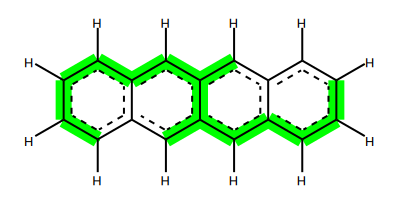

In [41]:
svg

In [30]:
atom_importance

array([0.0179185 , 0.01738463, 0.00962763, 0.01302362, 0.02706414,
       0.02523424, 0.00777658, 0.02462136, 0.01946989, 0.02219461,
       0.03051475, 0.009685  , 0.00770392, 0.02520141, 0.01751009,
       0.02136801, 0.03052093, 0.00966732, 0.01270197, 0.03059777,
       0.03262352, 0.03174214, 0.02868167, 0.00879437, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        ], dtype=float32)